In [1]:
import numpy as np
from pathlib import Path
import matplotlib.pyplot as plt
import agg_utils
import metrics
from functools import partial

# plt.rcParams.update({
#     "font.familty": "serif",
#     "font.serif": ["Times New Roman"]
# })

plt.rcParams["xtick.major.size"] = 8
plt.rcParams["ytick.major.size"] = 8
plt.rcParams["xtick.major.width"] = 2
plt.rcParams["ytick.major.width"] = 2

In [2]:
# conformal predictiong conf. 
alpha_min = 0.05
alpha_max = 0.95
alpha_step = 0.05

# num repetition
r_min = 0
r_max = 100

# feature extraction conf.
dst_results ="../results"
level = 16
scale = 0.25
n_trials = 50
n_estimators = 200
model = "rf"
dryrun = False

In [3]:
root_exp = Path(dst_results) / (
    "feat" + 
    f"_level_{level}" + 
    f"_scale_{scale}" + 
    f"_trial_{n_trials}" + 
    f"_n_est_{n_estimators}" + 
    f"_model_{model}" + 
    f"_alpha_min_{alpha_min}" + 
    f"_alpha_max_{alpha_max}" + 
    f"_alpha_step_{alpha_step}" + 
    f"_dryrun_{dryrun}"
)

alphas = np.arange(alpha_min, alpha_max + alpha_step, alpha_step).round(2)

In [4]:
label_her2 = ["Neg", "Pos"]
label_ihc = ["0", "1+", "2+", "3+"]

# 1) patch-level HER2
heights1 = agg_utils.agg_heights(
    root_exp, r_min, r_max, alphas,
    partial(metrics.acc_her2, level="patch"),
    label_her2
)

# 2) patch-level IHC
heights2 = agg_utils.agg_heights(
    root_exp, r_min, r_max, alphas,
    partial(metrics.acc_group2_ihc, level="patch"),
    label_ihc
)

# 3) case-level HER2
heights3 = agg_utils.agg_heights(
    root_exp, r_min, r_max, alphas,
    partial(metrics.acc_her2, level="case"),
    label_her2
)

# 4) case-level IHC
heights4 = agg_utils.agg_heights(
    root_exp, r_min, r_max, alphas,
    partial(metrics.acc_group2_ihc, level="case"),
    label_ihc
)

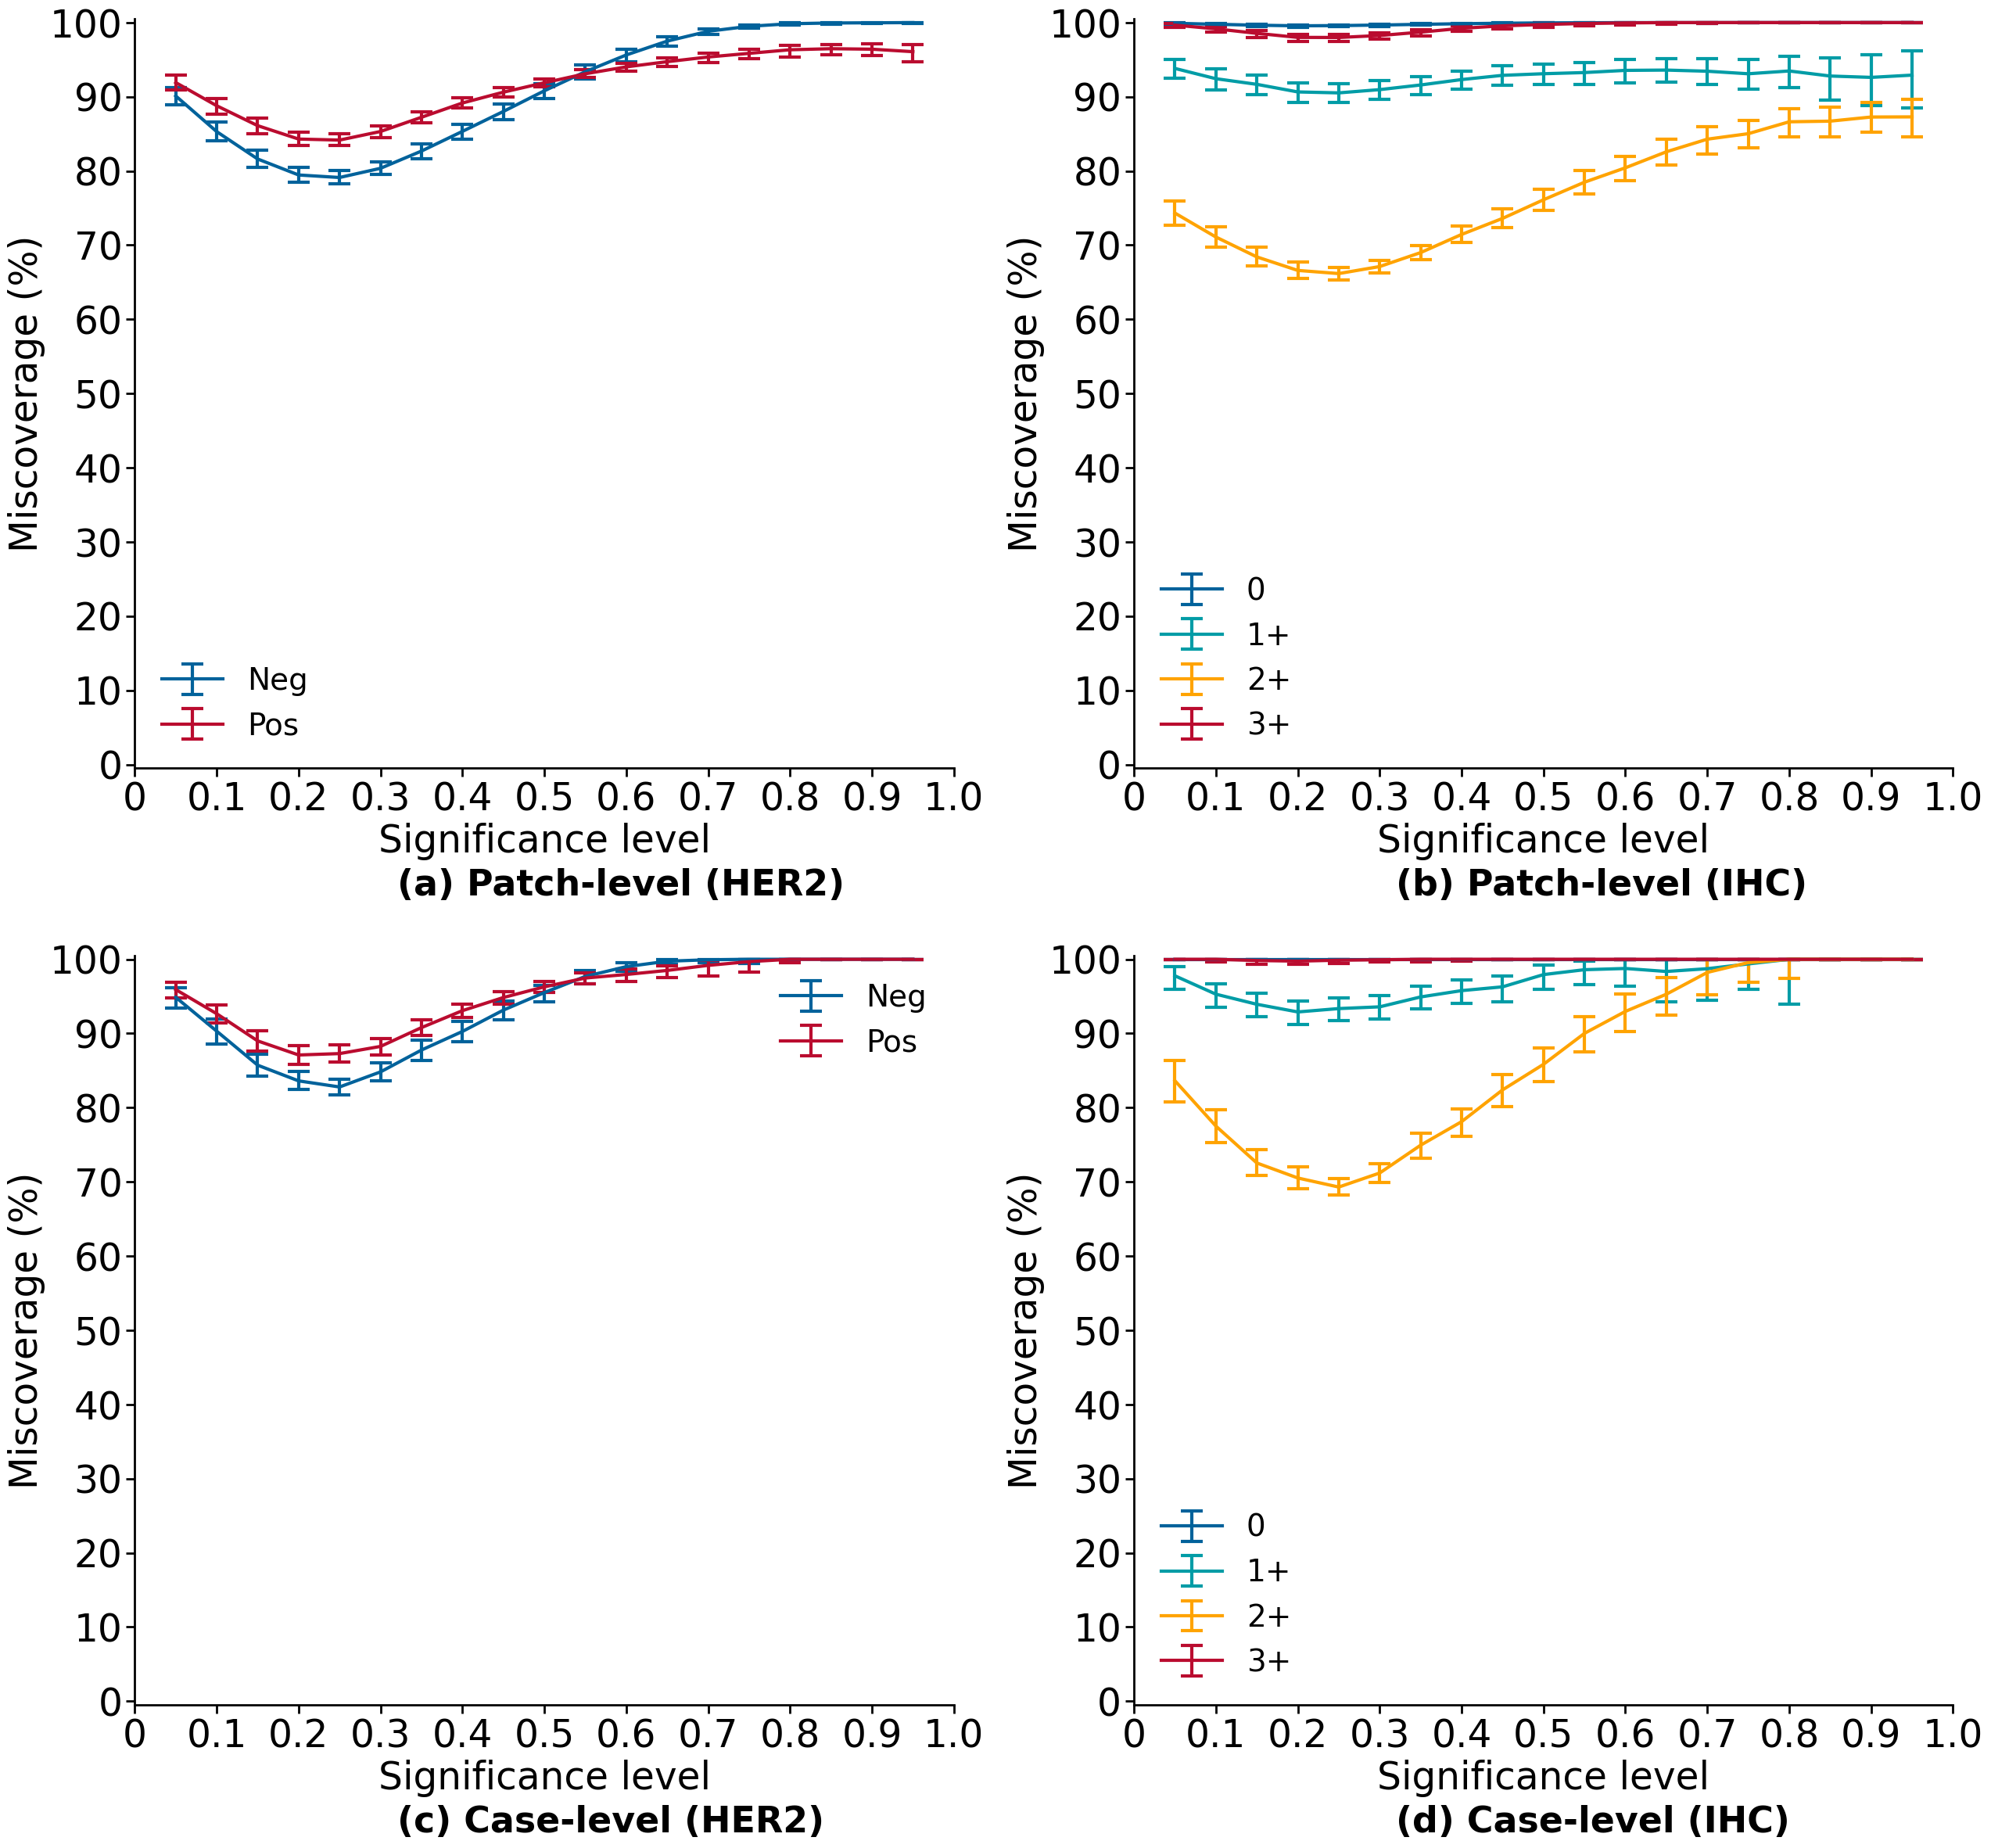

In [25]:
# figure config
labelsize = 35
ticksize= 35
legendfontsize = 28
subfigfontsize = 33
set_ax = True

color_her2 = ["#00629B", "#BA0C2F"]
color_ihc = ["#00629B", "#009CA6", "#FFA300", "#BA0C2F"]

fig, axs = plt.subplots(
    2,2, figsize=(30, 28), gridspec_kw={"hspace": 0.25, "wspace": 0.22}
)
##########################################################################################
for i, col in enumerate(label_her2):
    lower_err = np.array(heights1[col]["err_min"])
    upper_err = np.array(heights1[col]["err_max"])
    heights = np.array(heights1[col]["mean"])
    # adjust upper_err to max at 1
    upper_err = np.minimum(upper_err + heights, 1) - heights
    asym_err = [lower_err, upper_err]
    axs[0, 0].errorbar(
        alphas,
        np.array(heights1[col]["mean"]),
        yerr=asym_err, fmt="-",
        color=color_her2[i],
        label=label_her2[i],
        capsize=10,
        capthick=3,
        linewidth=3
    )

if set_ax:
    axs[0, 0].legend(frameon=False, fontsize=legendfontsize)
    axs[0, 0].set_xticks(
        ticks=[round(n, 1) for n in np.arange(0, 1+0.1, 0.1)],
        labels=[round(n, 1) if n > 0 else int(n) for n in np.arange(0, 1+0.1, 0.1)],
        fontsize=ticksize
    )
    axs[0, 0].set_yticks(
        ticks=[round(n, 1) for n in np.arange(0, 1+0.1, 0.1)],
        labels=[int(n * 100) for n in np.arange(0, 1+0.1, 0.1)],
        fontsize=ticksize
    )
    axs[0, 0].set_xlim([0, 1])
    axs[0, 0].set_ylim([0 - 0.005, 1 + 0.005])
    axs[0, 0].set_ylabel("Miscoverage (%)", fontsize=labelsize)
    axs[0, 0].set_xlabel("Significance level", fontsize=labelsize)
    axs[0, 0].spines["top"].set_visible(False)
    axs[0, 0].spines["right"].set_visible(False)
    axs[0, 0].spines["bottom"].set_linewidth(2)
    axs[0, 0].spines["left"].set_linewidth(2)
    axs[0, 0].legend(frameon=False, fontsize=legendfontsize)
    axs[0, 0].text(
        0.32, -0.17,
        "(a) Patch-level (HER2)", fontsize=subfigfontsize, weight="bold",
        transform=axs[0, 0].transAxes
    )
##########################################################################################
for i, col in enumerate(label_ihc):
    lower_err = np.array(heights2[col]["err_min"])
    upper_err = np.array(heights2[col]["err_max"])
    heights = np.array(heights2[col]["mean"])
    # adjust upper_err to max at 1
    upper_err = np.minimum(upper_err + heights, 1) - heights
    asym_err = [lower_err, upper_err]
    axs[0, 1].errorbar(
        alphas,
        np.array(heights2[col]["mean"]),
        yerr=asym_err, fmt="-",
        color=color_ihc[i],
        label=label_ihc[i],
        capsize=10,
        capthick=3,
        linewidth=3
    )

if set_ax:
    axs[0, 1].legend(frameon=False, fontsize=legendfontsize)
    axs[0, 1].set_xticks(
        ticks=[round(n, 1) for n in np.arange(0, 1+0.1, 0.1)],
        labels=[round(n, 1) if n > 0 else int(n) for n in np.arange(0, 1+0.1, 0.1)],
        fontsize=ticksize
    )
    axs[0, 1].set_yticks(
        ticks=[round(n, 1) for n in np.arange(0, 1+0.1, 0.1)],
        labels=[int(n * 100) for n in np.arange(0, 1+0.1, 0.1)],
        fontsize=ticksize
    )
    axs[0, 1].set_xlim([0, 1])
    axs[0, 1].set_ylim([0 - 0.005, 1 + 0.005])
    axs[0, 1].set_ylabel("Miscoverage (%)", fontsize=labelsize)
    axs[0, 1].set_xlabel("Significance level", fontsize=labelsize)
    axs[0, 1].spines["top"].set_visible(False)
    axs[0, 1].spines["right"].set_visible(False)
    axs[0, 1].spines["bottom"].set_linewidth(2)
    axs[0, 1].spines["left"].set_linewidth(2)
    axs[0, 1].legend(frameon=False, fontsize=legendfontsize)
    axs[0, 1].text(
        0.32, -0.17,
        "(b) Patch-level (IHC)", fontsize=subfigfontsize, weight="bold",
        transform=axs[0, 1].transAxes
    )
# ##########################################################################################
for i, col in enumerate(label_her2):
    lower_err = np.array(heights3[col]["err_min"])
    upper_err = np.array(heights3[col]["err_max"])
    heights = np.array(heights3[col]["mean"])
    # adjust upper_err to max at 1
    upper_err = (np.minimum(upper_err + heights, 1) - heights) 
    asym_err = [lower_err, upper_err]
    axs[1, 0].errorbar(
        alphas,
        np.array(heights3[col]["mean"]),
        yerr=asym_err, fmt="-",
        color=color_her2[i],
        label=label_her2[i],
        capsize=10,
        capthick=3,
        linewidth=3
    )

if set_ax:
    axs[1, 0].legend(frameon=False, fontsize=legendfontsize)
    axs[1, 0].set_xticks(
        ticks=[round(n, 1) for n in np.arange(0, 1+0.1, 0.1)],
        labels=[round(n, 1) if n > 0 else int(n) for n in np.arange(0, 1+0.1, 0.1)],
        fontsize=ticksize
    )
    axs[1, 0].set_yticks(
        ticks=[round(n, 1) for n in np.arange(0, 1+0.1, 0.1)],
        labels=[int(n * 100) for n in np.arange(0, 1+0.1, 0.1)],
        fontsize=ticksize
    )
    axs[1, 0].set_xlim([0, 1])
    axs[1, 0].set_ylim([0 - 0.005, 1 + 0.005])
    axs[1, 0].set_ylabel("Miscoverage (%)", fontsize=labelsize)
    axs[1, 0].set_xlabel("Significance level", fontsize=labelsize)
    axs[1, 0].spines["top"].set_visible(False)
    axs[1, 0].spines["right"].set_visible(False)
    axs[1, 0].spines["bottom"].set_linewidth(2)
    axs[1, 0].spines["left"].set_linewidth(2)
    axs[1, 0].legend(frameon=False, fontsize=legendfontsize)
    axs[1, 0].text(
        0.32, -0.17,
        "(c) Case-level (HER2)", fontsize=subfigfontsize, weight="bold",
        transform=axs[1, 0].transAxes
    )
##########################################################################################
for i, col in enumerate(label_ihc):
    lower_err = np.array(heights4[col]["err_min"])
    upper_err = np.array(heights4[col]["err_max"])
    heights = np.array(heights4[col]["mean"])
    # adjust upper_err to max at 1
    upper_err = (np.minimum(upper_err + heights, 1) - heights) * (upper_err > 0)
    asym_err = [lower_err, upper_err]
    axs[1, 1].errorbar(
        alphas,
        np.array(heights4[col]["mean"]),
        yerr=asym_err, fmt="-",
        color=color_ihc[i],
        label=label_ihc[i],
        capsize=10,
        capthick=3,
        linewidth=3
    )

if set_ax:
    axs[1, 1].legend(frameon=False, fontsize=legendfontsize)
    axs[1, 1].set_xticks(
        ticks=[round(n, 1) for n in np.arange(0, 1+0.1, 0.1)],
        labels=[round(n, 1) if n > 0 else int(n) for n in np.arange(0, 1+0.1, 0.1)],
        fontsize=ticksize
    )
    axs[1, 1].set_yticks(
        ticks=[round(n, 1) for n in np.arange(0, 1+0.1, 0.1)],
        labels=[int(n * 100) for n in np.arange(0, 1+0.1, 0.1)],
        fontsize=ticksize
    )
    axs[1, 1].set_xlim([0, 1])
    axs[1, 1].set_ylim([0 - 0.005, 1 + 0.005])
    axs[1, 1].set_ylabel("Miscoverage (%)", fontsize=labelsize)
    axs[1, 1].set_xlabel("Significance level", fontsize=labelsize)
    axs[1, 1].spines["top"].set_visible(False)
    axs[1, 1].spines["right"].set_visible(False)
    axs[1, 1].spines["bottom"].set_linewidth(2)
    axs[1, 1].spines["left"].set_linewidth(2)
    axs[1, 1].legend(frameon=False, fontsize=legendfontsize)
    axs[1, 1].text(
        0.32, -0.17,
        "(d) Case-level (IHC)", fontsize=subfigfontsize, weight="bold",
        transform=axs[1, 1].transAxes
    )

In [26]:
# Case level ambiguity for significance level
alpha = 0.05

print(model)
strs = []
min_idx = np.argmax(alphas == alpha)
print("alpha:", alphas[min_idx])
for i, k in enumerate(heights3.keys()):
    mean_ambi = heights3[k]["mean"][min_idx] * 100
    top_err = heights3[k]["err_min"][min_idx] * 100
    bot_err = heights3[k]["err_max"][min_idx] * 100
    strs.append(
        f"{round(mean_ambi, 1)} ({round(mean_ambi - top_err, 1)}-{round(mean_ambi + top_err, 1)})"
    )
print("Case-HER2 (Neg|Pos):", " | ".join(strs))

strs = []
for i, k in enumerate(heights4.keys()):
    mean_ambi = heights4[k]["mean"][min_idx] * 100
    top_err = heights4[k]["err_min"][min_idx] * 100
    bot_err = heights4[k]["err_max"][min_idx] * 100
    strs.append(
        f"{round(mean_ambi, 1)} ({round(mean_ambi - top_err, 1)}-{round(mean_ambi + top_err, 1)})"
    )
print("Case-IHC(0|1|2|3):", " | ".join(strs))

rf
alpha: 0.05
Case-HER2 (Neg|Pos): 94.9 (93.5-96.3) | 95.9 (94.8-97.0)
Case-IHC(0|1|2|3): 100.0 (100.0-100.0) | 97.8 (96.0-99.5) | 83.6 (80.8-86.5) | 100.0 (100.0-100.0)


In [4]:
# Case level accuracy specifically for 2+ cases (2- = DISH-, 2+ = DISH+)
heights_ = agg_utils.agg_heights(
    root_exp, r_min, r_max, alphas,
    partial(metrics.acc_equivocal_ihc, level="case"),
    ["2-", "2+"]
)

/Users/11481488/Downloads/her2cp/.venv/lib/python3.12/site-packages/scipy/stats/_resampling.py:149: RuntimeWarning: invalid value encountered in scalar divide
  a_hat = 1/6 * sum(nums) / sum(dens)**(3/2)
/Users/11481488/Downloads/her2cp/Analysis/agg_utils.py:106: DegenerateDataWarning: The BCa confidence interval cannot be calculated. This problem is known to occur when the distribution is degenerate or the statistic is np.min.
  bi = bootstrap(v, statistic=np.mean)


In [6]:
alpha = 0.05

print(model)
strs = []
min_idx = np.argmax(alphas == alpha)
print("alpha:", alphas[min_idx])
for i, k in enumerate(heights_.keys()):
    mean_ambi = heights_[k]["mean"][min_idx] * 100
    top_err = heights_[k]["err_min"][min_idx] * 100
    bot_err = heights_[k]["err_max"][min_idx] * 100
    strs.append(
        f"{round(mean_ambi, 1)} ({round(mean_ambi - top_err, 1)}-{round(mean_ambi + top_err, 1)})"
    )
print("Case-HER2 (Neg|Pos):", " | ".join(strs))

rf
alpha: 0.05
Case-HER2 (Neg|Pos): 79.9 (74.3-85.5) | 83.9 (78.6-89.2)
